In [43]:
import os
import numpy as np
#import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from Utils99 import *
from Utils_graph import *
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from vmdpyR2 import * 

window = 1024
fs = 25600
main = 'XJTU_FLTR_R1/'

FILTER SIGNAL

In [79]:
brng = 'Bearing2_3/'
out = main + '/DATA/'
folder = 'XJTU/XJTU-SY_Bearing_Datasets/37.5Hz11kN/'
samples = os.listdir(folder+brng)
samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
lcut = 2000
hcut = 8000
for sample in samples:
    df = pd.read_csv(folder+brng+sample)
    s1 = df.iloc[:,0].values
    s1 = s1-np.mean(s1)
    s2 = df.iloc[:,1].values
    s2 = s1-np.mean(s2)
    df.iloc[:,0] = bandpass_filter(s1,lcut,hcut,fs)
    df.iloc[:,1] = bandpass_filter(s2,lcut,hcut,fs)
    df.to_csv(out+brng+sample,index=False)

CALCULATE FEATURES

In [ ]:
dir = '03_VMDY/'
out = '03_FTRSY/'
dir = '02_VMDX/'
out = '02_FTRSX/'
brngs = os.listdir(dir)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs:
    features = []
    samples = os.listdir(dir+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    print(brng)
    for sample in samples:
        df = pd.read_csv(dir+brng+'/'+sample)
        sig = df['IMF1'].values
        sig = sig-np.mean(sig)
        tf, tn = time_features(sig)
        ff, fn = freq_features(sig)
        features.append(tf+ff)
    features = pd.DataFrame(features)
    features.columns = tn+fn

    features.to_csv(out+brng+'.csv',index=False)

PLOT ALL FEATURES AND SAVE PLOT

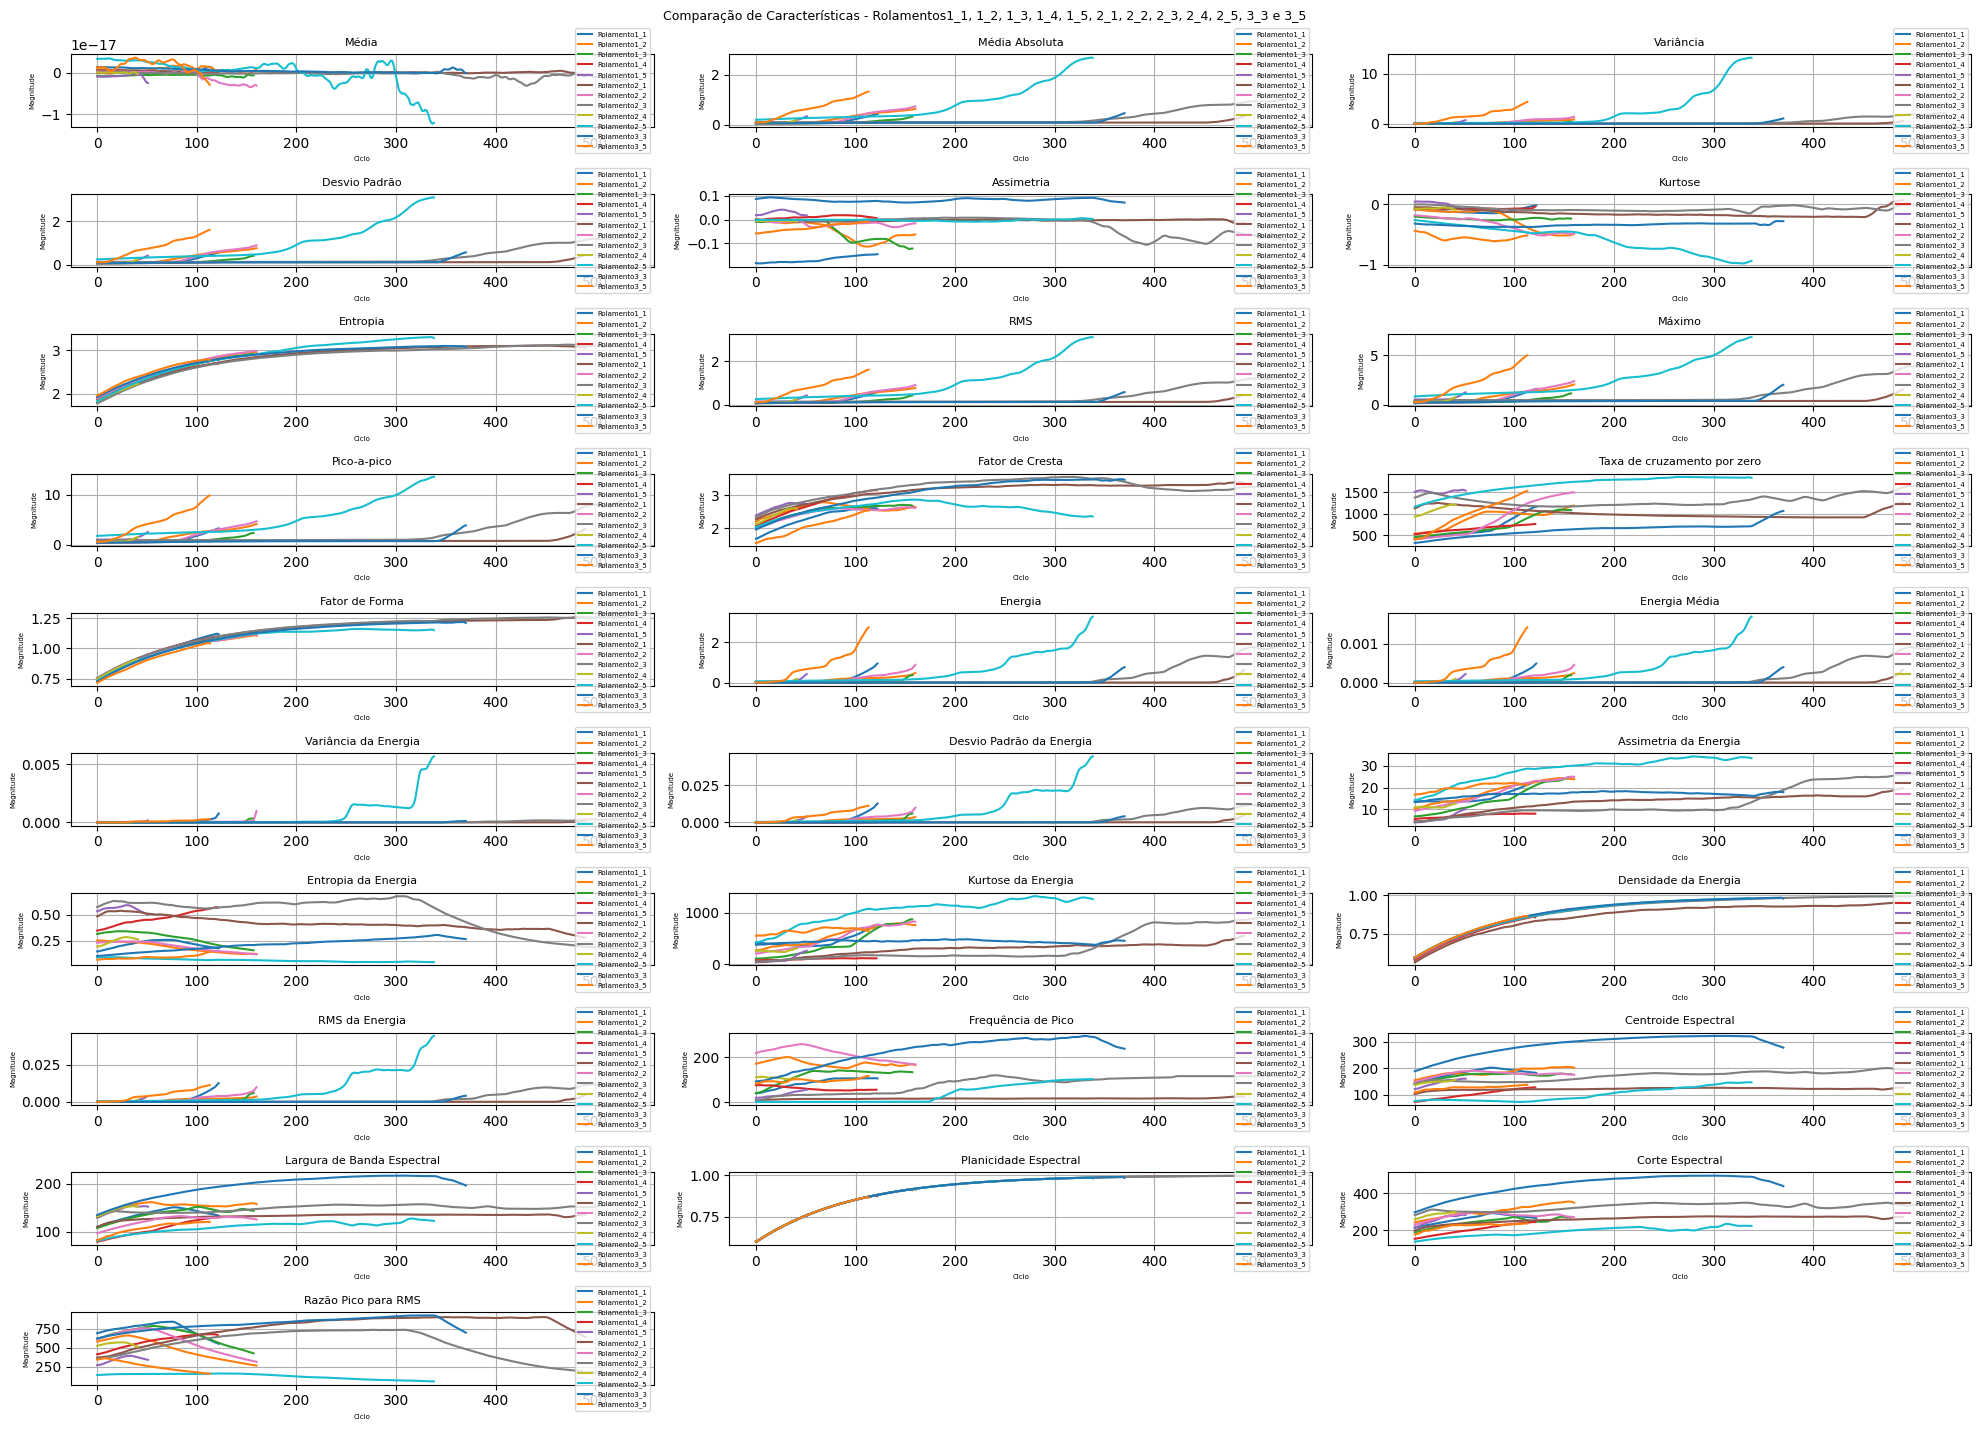

In [8]:
dir = '02_FTRSX/'
#dir = '03_FTRSY/'

brngs = os.listdir(dir)
labels = [('Rolamento'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    #if brng.startswith('Bearing1') or brng.startswith('Bearing2'):
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = moving_average_df(df,5)
    df=exponential_moving_average_df(df, alpha=0.01)
    dfs.append(df)
plot_multiple_features(dfs,out, 3, brngs, labels, show=False, w=20, h=15)

In [ ]:
dir = '03_FTRS/'
out = '03FTRS/'
brngs = os.listdir(dir)
labels = [('R'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    if brng.startswith('Bearing1') or brng.startswith('Bearing2'):
        path = dir+brng
        df = pd.read_csv(dir+brng)
        #df = moving_average_df(df,10)
        #df=exponential_moving_average_df(df, alpha=0.015)
        dfs.append(df)
    plot_multiple_features(dfs,out, 3, brngs, labels, show=True, w=6.1, h=7.1)

PLOT METRICS AND SAVE FILTERED METRICS & PLOT

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py:320: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.

c:\MestradoPY\Utils_graph.py

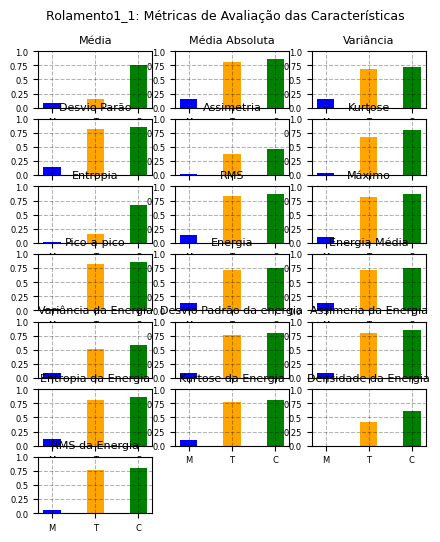

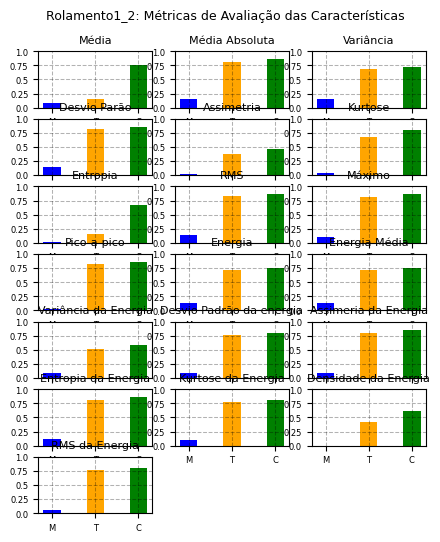

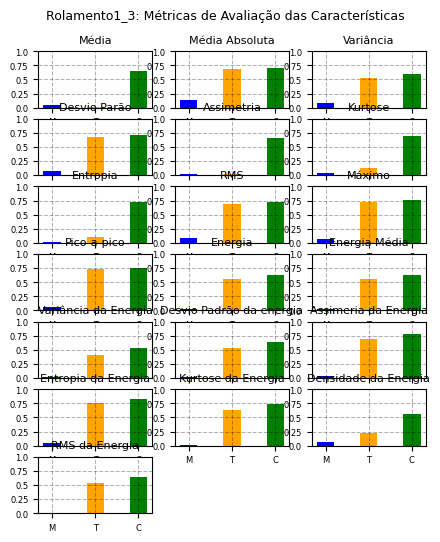

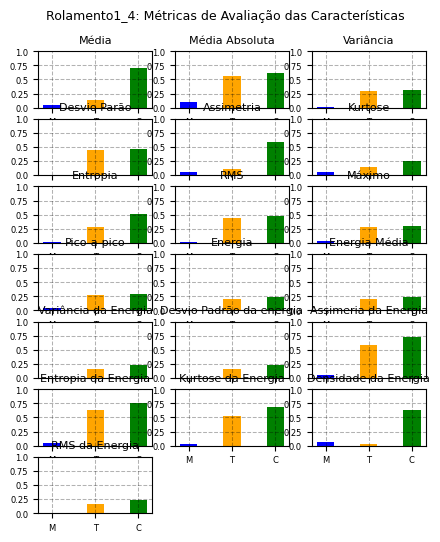

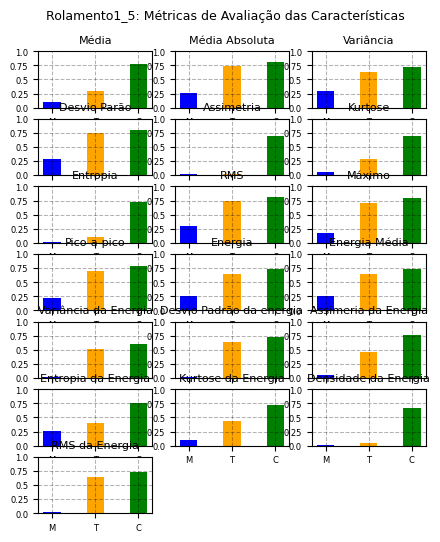

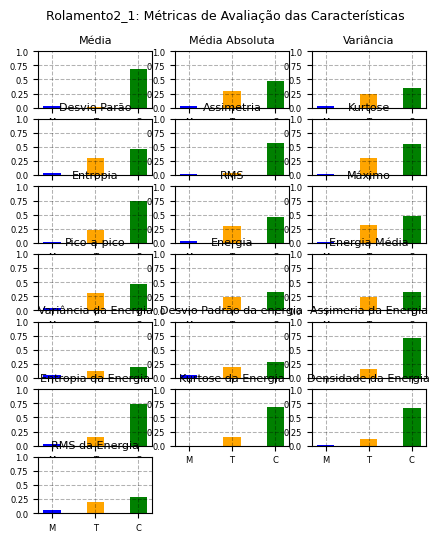

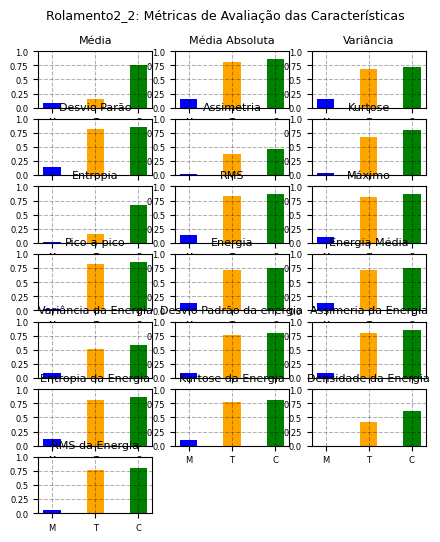

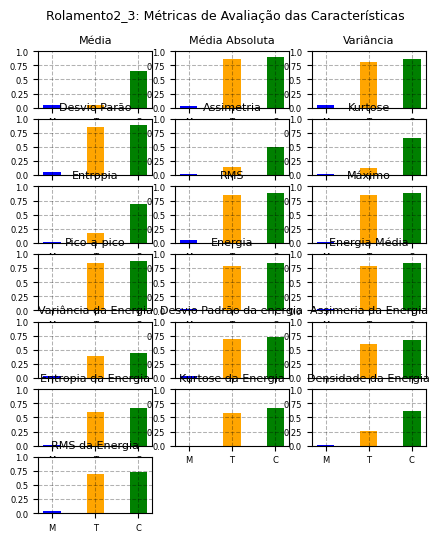

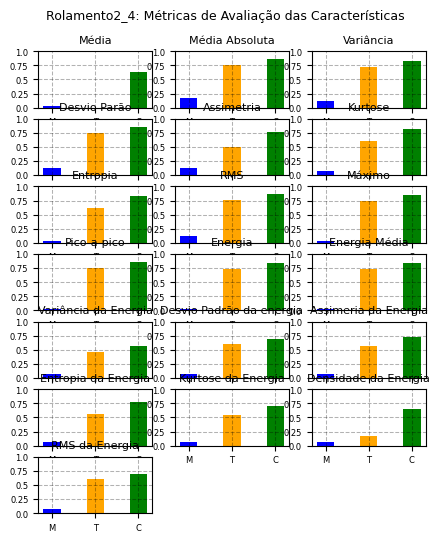

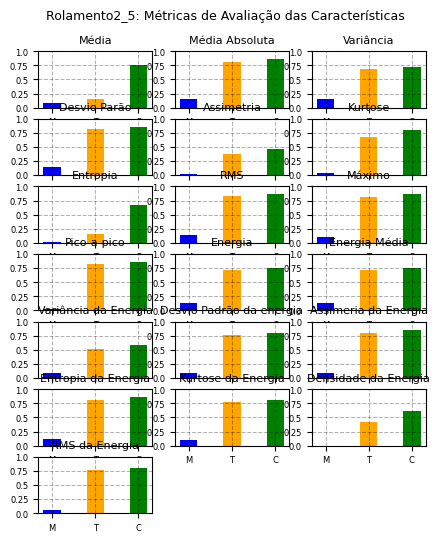

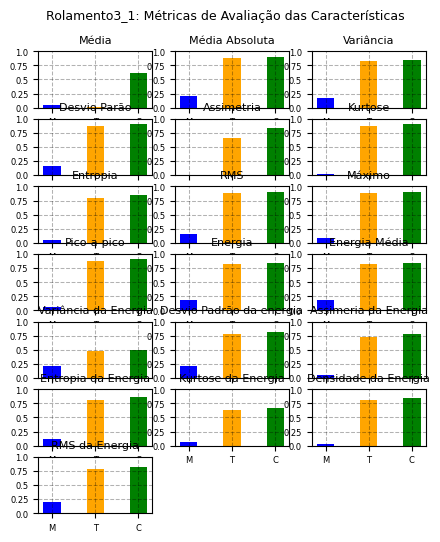

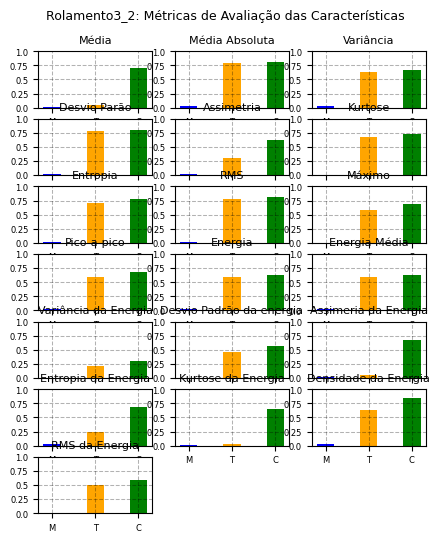

In [13]:
#dir = main+'FEATURES/'
dir = '03_FTRS/'
out ='04_PERFORMANCE/'
brngs = os.listdir(dir)
qtd=3
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    #df = moving_average_df(df,10)
    #df = exponential_moving_average_df(df, alpha=0.015)
    df = plot_metrics(df,out,cols_qtd=qtd,brng=brng, show=False, w = 5, h=6)

In [4]:
np.arange(0, 1.25, .25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

FILTER BY METRICS (MONOTONICITY, TRENDABILITY AND CORRELATION)

In [ ]:
out = '04_PERFORMANCE/'
dir = '03_FTRS/'
brngs = os.listdir(dir)
qtd=4
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = moving_average_df(df,10)
    df = exponential_moving_average_df(df, alpha=0.01)
    df = plot_metrics(df,out,cols_qtd=qtd,brng=brng, show=False, w = 8, h=6)
    df.to_csv(out+brng, index=False)

SELECT THE SAME FEATURES

In [5]:
dir ='04_PERFORMANCE/'
brngs = os.listdir(dir)
clmns = []
for brng in brngs:
    df=pd.read_csv(dir+brng)
    clmns.append(df.columns)
features = set(clmns[0]).intersection(*clmns[1:])
features = list(features)

for brng in brngs:
    df_r = pd.DataFrame()
    df=pd.read_csv(dir+brng)
    for feature in features:
        df_r[feature] = df[feature]
    df_r.to_csv(dir+brng,index=False)
print(df_r.columns)

Index(['Média Absoluta', 'Desvio Parão', 'Entropia', 'RMS',
       'Densidade da Energia'],
      dtype='object')


CREATE PCA HI

In [6]:
dir = '04_PERFORMANCE/'
#dir = 'XJTU_FEATURES_FLTR/'
out = '05_HI/'
#out = 'XJTU_HI/'
brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    path = dir+brng
    print(path)
    df = pd.read_csv(path)
    dataframes.append(df)
    lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)

dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for frame,brng in zip(dataframes,brngs):
    dados_fundidos, modelo_pca = aplicar_pca_e_fundir(frame, n_componentes=1)
    dados_fundidos.to_csv(out+brng,index=False)
    dfs.append(dados_fundidos)

df_r = pd.concat(dfs,ignore_index=True)
df_r = normalize_df(df_r)
dfs = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]
for df,brng in zip(dfs,brngs):
    df.to_csv(out+brng,index=False)


04_PERFORMANCE/Bearing1_1.csv
04_PERFORMANCE/Bearing1_2.csv
04_PERFORMANCE/Bearing1_3.csv
04_PERFORMANCE/Bearing1_4.csv
04_PERFORMANCE/Bearing1_5.csv
04_PERFORMANCE/Bearing2_1.csv
04_PERFORMANCE/Bearing2_2.csv
04_PERFORMANCE/Bearing2_3.csv
04_PERFORMANCE/Bearing2_4.csv
04_PERFORMANCE/Bearing2_5.csv


PLOT HEALTH/DEGRADATION INDICATOR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


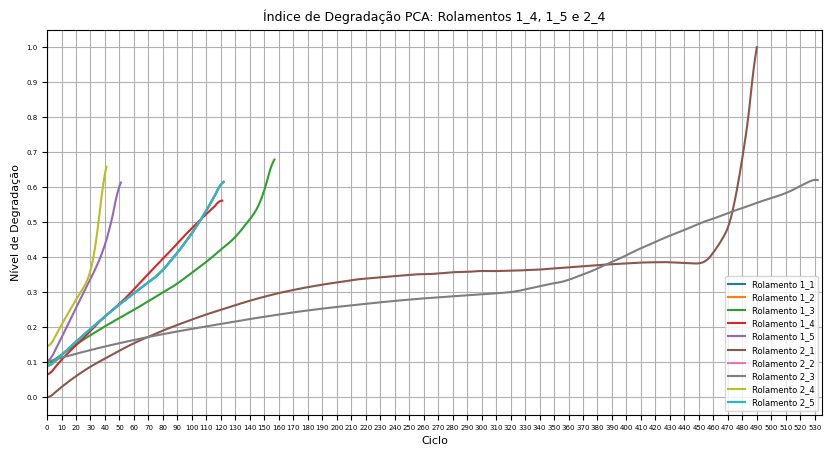

In [7]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dfs,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="lower right",fontsize = 6) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
plt.savefig(out+'PCA_HI.eps', dpi=500)
plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

In [171]:
path = 'XJTU2/Bearing1_3/158.csv'
df = pd.read_csv(path)
sig = df['Horizontal_vibration_signals']
modes, _, _ = VMD(sig, alpha=2000, tau=0, K=5, DC=0, init=1, tol=1e-6)
x = [i*(1/25600) for i in range(len(sig))]

In [201]:
def plot_3d_matplotlib2(df, width, height, title='r', xlabel='Tempo (s)', ylabel='Componente', zlabel='Amplitude'):
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(111, projection='3d')

    num_samples = len(df)
    x = [i*(1/25600) for i in range(len(df))]
    num_series = len(df.columns)

    for i in range(num_series):
        #x = np.arange(num_samples)
        y = np.full_like(x, i)
        z = df.iloc[:, i].values

        ax.plot(x, y, z, label=str(df.columns[i]), linewidth=0.75)

    #ax.set_title(title)
    ax.set_xlabel(xlabel,fontsize = 13)
    ax.tick_params(axis='x', labelsize=10)
    ax.xaxis.labelpad = 5
    ax.xaxis.set_tick_params(pad=1)
    ax.set_ylabel(ylabel,fontsize = 13)
    ax.tick_params(axis='y', labelsize=10)
    ax.yaxis.labelpad = 1
    ax.yaxis.set_tick_params(pad=1)
    ax.set_zlabel(zlabel,fontsize = 13)
    ax.tick_params(axis='z', labelsize=10)
    ax.zaxis.labelpad = 1
    ax.zaxis.set_tick_params(pad=1)
    ax.set_zlabel(zlabel,fontsize = 12)
    ax.view_init(elev=45, azim=300)
    ax.legend(bbox_to_anchor=(+1.5, 0.5))
    ax.set_zlim(-10, 10)
    ax.set_ylim(0, 5)

    # Ajuste de margens
    plt.tight_layout()
    #plt.subplots_adjust(left=0.001, right=0.99, top=0.9, bottom=0.1)
    plt.savefig('C:/MestradoPY2/00_Qualificação/[PPGEE-2025] Apresentação/figuras/figuras_arquivos/vmd2.png', dpi=500)
    plt.show()

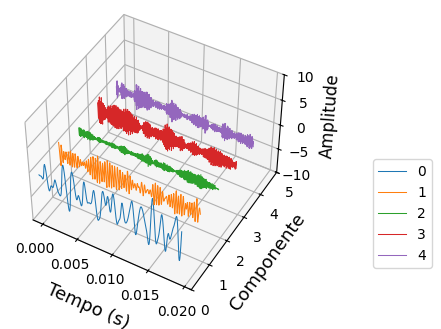

In [203]:
df1 = pd.DataFrame(modes).T
plot_3d_matplotlib2(df1[:500], width=5, height=5)

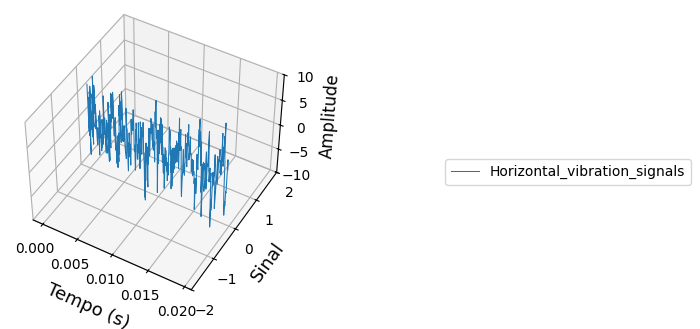

In [192]:
df2 = pd.DataFrame(sig)
plot_3d_matplotlib2(df2[:500], width=5, height=5)

In [ ]:
def plot_multiple_features2(dfs,out, cols_qtd, brngs, labels, show=True, w=12, h=6):
    names = [brngs[i][7:-4] for i in range(len(brngs))]
    """
    Plota múltiplas séries temporais de até três DataFrames em um conjunto de subplots.

    Parâmetros:
    - dfs: Lista contendo os DataFrames a serem comparados (exatamente 3).
    - cols_qtd: Número de colunas de subplots.
    - brngs: Lista com os nomes dos bearings (usado no título).
    - labels: Lista com rótulos para os DataFrames na legenda.
    - show: Se True, exibe o gráfico.
    - w: Largura da figura.
    - h: Altura da figura.

    Retorna:
    - None (exibe o gráfico).
    """

    # Pegar as colunas do primeiro DataFrame (assume que os 3 têm as mesmas colunas)
    columns = dfs[0].columns
    nc = cols_qtd  # Número de colunas de subplots
    nr = -(-len(columns) // nc)  # Cálculo correto do número de linhas (ceil)

    # Criar figura e subplots
    fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(w, h))
    #fig.suptitle(f'Comparação de Características - Rolamentos{", ".join(names[:-1])} e {names[-1]} '
    #             , fontsize=9, y =0.95)


    # Garantir que `axes` seja uma matriz 2D
    axes = np.array(axes).flatten()

    # 🔹 Loop sobre cada coluna para plotar os três DataFrames no mesmo subplot
    for i, column in enumerate(columns):
        for df, label in zip(dfs, labels):
            #print(label)
            axes[i].plot(df.index, df[column], label=label)
        #print(column)
        axes[i].set_title(column, fontsize=12)
        axes[i].grid(True)
        axes[i].tick_params(axis="both", labelsize=10)
        #axes[i].legend(fontsize=5,loc="center right")
        axes[i].set_xlabel("Ciclo", fontsize=12) 
        axes[i].set_ylabel("Magnitude", fontsize=12) 
        axes[i].set_xlim(0, 123)

    # Remover subplots vazios, se existirem
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar layout para melhor visualização
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.subplots_adjust(left=0.1, right=0.95, top=0.8, bottom=0.25)


    # Exibir o gráfico se necessário
    if show:
        #plt.savefig(out+'Features.eps', dpi=500)
        plt.savefig('C:/MestradoPY2/00_Qualificação/[PPGEE-2025] Apresentação/figuras/figuras_arquivos/Features.png', dpi=500)
        plt.show()

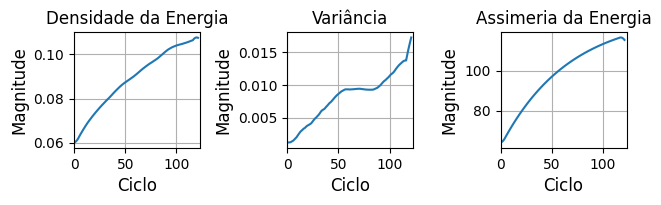

In [250]:
dir = 'XJTU_FEATURES_FLTR/'
out ='XJTU_FLTR/PERFORMANCE/'
brngs = os.listdir(dir)
labels = [('R'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    if brng.endswith('1_4.csv'):
        path = dir+brng
        df = pd.read_csv(dir+brng)
        #df = moving_average_df(df,10)
        #df=exponential_moving_average_df(df, alpha=0.015)
        dfs.append(df.iloc[:,5:8])
plot_multiple_features2(dfs,out, 3, brngs, labels, show=True, w=6.5, h=2.1)

In [304]:
path = 'XJTU/XJTU-SY_Bearing_Datasets/35Hz12kN/Bearing1_5/'
samples = os.listdir(path)
samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
v = np.array([])
x = np.array([])
for j,sample in enumerate(samples):
    df = pd.read_csv(path+sample)
    sig = df['Horizontal_vibration_signals'].values
    v = np.concatenate((v,sig),axis=0)
    x = np.concatenate((x,np.array([i*(1/25600)+(60*(j+1)) for i in range(len(v))])),axis=0)

In [305]:
x[-1]

np.float64(3186.5599609375)

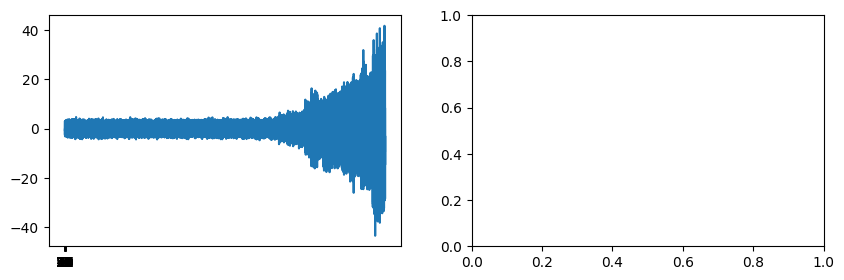

In [288]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].set_xticks(sorted(xticks))
axes[0].tick_params(axis='x', labelcolor='black')
axes[0].plot(v)

In [15]:
import numpy as np
from numba import njit

@njit(fastmath=True)
def pearson_correlation(xk, x1):
    """
    Calcula a correlação de Pearson entre dois vetores xk e x1 
    usando Numba para alta performance.
    """
    n = len(xk)
    
    # Verifica se os tamanhos são compatíveis
    if n != len(x1):
        raise ValueError("Os arrays devem ter o mesmo tamanho.")

    # 1. Cálculo das médias (bar_xk e bar_x1 na fórmula)
    mean_k = 0.0
    mean_1 = 0.0
    for i in range(n):
        mean_k += xk[i]
        mean_1 += x1[i]
    mean_k /= n
    mean_1 /= n

    # 2. Cálculo do Numerador e Denominador
    numerator = 0.0
    sum_sq_diff_k = 0.0
    sum_sq_diff_1 = 0.0

    for i in range(n):
        diff_k = xk[i] - mean_k
        diff_1 = x1[i] - mean_1
        
        # Somatório do produto das diferenças (Numerador)
        numerator += diff_k * diff_1
        
        # Somatório dos quadrados das diferenças (partes do Denominador)
        sum_sq_diff_k += diff_k ** 2
        sum_sq_diff_1 += diff_1 ** 2

    # O denominador é a raiz do produto das somas dos quadrados
    # Fórmula: sqrt( sum((xk-mean_k)^2) * sum((x1-mean_1)^2) )
    denominator = np.sqrt(sum_sq_diff_k * sum_sq_diff_1)

    if denominator == 0:
        return 0.0  # Evita divisão por zero se a variância for nula

    return numerator / denominator

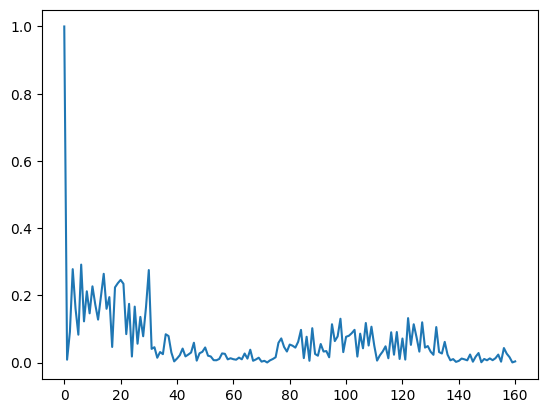

In [16]:
dir = '02_VMDX/'
brngs = os.listdir(dir)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs:
    corr = np.array([])
    samples = os.listdir(dir+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    df1 = pd.read_csv(dir+brng+'/1.csv')
    x1 = df1['IMF1'].values
    if brng.endswith('Bearing1_2'):
        for sample in samples:
            df = pd.read_csv(dir+brng+'/'+sample)
            xk = df['IMF1'].values
            corr = np.append(corr,pearson_correlation(xk, x1))
            
            #sig = df['IMF1'].values
            #sig = sig-np.mean(sig)
            #features.append(tf+ff)
        #features = pd.DataFrame(features)
        plt.plot(np.abs(corr))

    #features.to_csv(out+brng+'.csv',index=False)

In [25]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from numba import njit

# 1. Função Numba Otimizada (Semi-Vectorizada)
@njit(fastmath=True)
def fast_pearson_precalc(xk, x1_centered, x1_norm):
    """
    Calcula Pearson assumindo que x1 já está centralizado e sua norma calculada.
    Isso corta as operações matemáticas pela metade.
    """
    n = len(xk)
    
    # Passo 1: Calcular média de xk
    mean_k = 0.0
    for i in range(n):
        mean_k += xk[i]
    mean_k /= n

    # Passo 2: Calcular numerador (produto escalar) e norma de xk
    numerator = 0.0
    sum_sq_diff_k = 0.0
    
    for i in range(n):
        diff_k = xk[i] - mean_k
        
        # O x1_centered[i] já foi calculado fora do loop!
        numerator += diff_k * x1_centered[i]
        sum_sq_diff_k += diff_k ** 2

    # Passo 3: Finalizar
    denom_k = np.sqrt(sum_sq_diff_k)
    
    # Evita divisão por zero
    if denom_k == 0 or x1_norm == 0:
        return 0.0
        
    return numerator / (denom_k * x1_norm)

# --- Configuração do Diretório ---
dir_path = '03_VMDY_FFT/' # Renomeei para evitar conflito com built-in dir()
out = '03_VMDY_FFT_CP/'
brngs = os.listdir(dir_path)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Loop Principal
for brng in brngs:
    folder_path = os.path.join(dir_path, brng)
    
    # Filtro específico do seu código
    #if not brng.endswith('Bearing1_2'):
    #    continue

    # Leitura do arquivo de referência (FEITO APENAS UMA VEZ POR PASTA)
    df1 = pd.read_csv(os.path.join(folder_path, '1.csv'))
    if dir_path.endswith('FFT/'): x1 = df1['Mode_1'].values.astype(np.float64) # Garantir float64 para numba
    else: x1 = df1['IMF1'].values.astype(np.float64) # Garantir float64 para numba

    # --- PRÉ-CÁLCULO DO X1 (Otimização Chave) ---
    x1_mean = np.mean(x1)
    x1_centered = x1 - x1_mean
    # Norma Euclidiana (parte do denominador da fórmula de Pearson)
    x1_norm = np.sqrt(np.sum(x1_centered**2))
    
    # Listar amostras
    samples = os.listdir(folder_path)
    samples = [s for s in samples if s.endswith('.csv')] # Garante que só pega csv
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    
    num_samples = len(samples)
    
    # --- OTIMIZAÇÃO DE MEMÓRIA ---
    # Alocar array vazio ao invés de usar np.append
    corr_results = np.zeros(num_samples)
    
    # Loop das amostras
    for idx, sample in enumerate(samples):
        # I/O ainda é o gargalo aqui. 
        # Se for muito lento, veja a dica sobre Joblib abaixo.
        df = pd.read_csv(os.path.join(folder_path, sample))
        if dir_path.endswith('FFT/'): xk = df['Mode_1'].values.astype(np.float64)
        else: xk = df['IMF1'].values.astype(np.float64) # Garantir float64 para numba

        # Chama a função otimizada
        # Note que passamos x1_centered e x1_norm, não o x1 original
        if len(xk) == len(x1_centered):
            corr_results[idx] = fast_pearson_precalc(xk, x1_centered, x1_norm)
        else:
            # Caso tamanhos difiram, trata erro ou ignora
            corr_results[idx] = 0.0
    df = pd.DataFrame()
    df['RS'] = np.abs(corr_results)
    df.to_csv(out+brng+'.csv',index=False)  
    

In [36]:
import numpy as np
import pandas as pd
import numba as nb

# ==============================================================================
# 1. FUNÇÕES AUXILIARES OTIMIZADAS COM NUMBA
# ==============================================================================

@nb.njit(fastmath=True)
def _calc_skew_kurt(x, mean, std, n):
    """Calcula Skewness e Kurtosis (Fisher) em uma única passada."""
    if std == 0:
        return 0.0, 0.0
    
    sum_pow3 = 0.0
    sum_pow4 = 0.0
    
    for i in range(n):
        val = (x[i] - mean) / std
        sum_pow3 += val ** 3
        sum_pow4 += val ** 4
        
    skew = sum_pow3 / n
    kurt = (sum_pow4 / n) - 3.0  # Fisher Kurtosis (normal = 0)
    return skew, kurt

@nb.njit(fastmath=True)
def _calc_entropy_spectral(power_spectrum):
    """Calcula Entropia de Shannon normalizada sobre um espectro de energia."""
    total_energy = np.sum(power_spectrum)
    if total_energy == 0:
        return 0.0
        
    entropy = 0.0
    for i in range(len(power_spectrum)):
        p = power_spectrum[i] / total_energy
        if p > 0:
            entropy -= p * np.log(p)
    return entropy

@nb.njit(fastmath=True)
def _calc_entropy_histogram(x, bins=10):
    """Calcula entropia simples baseada em histograma para séries temporais."""
    n = len(x)
    if n == 0: return 0.0
    
    mn = np.min(x)
    mx = np.max(x)
    if mn == mx: return 0.0
    
    # Histograma manual
    hist = np.zeros(bins, dtype=np.float64)
    width = (mx - mn) / bins
    
    for i in range(n):
        idx = int((x[i] - mn) / width)
        if idx >= bins: idx = bins - 1
        hist[idx] += 1
    
    # Entropia
    entropy = 0.0
    for i in range(bins):
        p = hist[i] / n
        if p > 0:
            entropy -= p * np.log(p)
    return entropy

# ==============================================================================
# 2. EXTRAÇÃO DE FEATURES (TIME & FREQ)
# ==============================================================================

@nb.njit(fastmath=True)
def get_time_features_numba(vec):
    n = len(vec)
    
    # Pré-cálculos básicos
    mean_val = np.mean(vec)
    abs_vec = np.abs(vec)
    mean_abs = np.mean(abs_vec)
    
    # Variância e Std
    var_val = np.var(vec)
    std_val = np.sqrt(var_val)
    
    # RMS
    # mean(square) é equivalente a var + mean^2, mas calculamos direto para precisão
    rms = np.sqrt(np.mean(vec**2))
    
    # Stats avançados (substitui scipy)
    skw, krt = _calc_skew_kurt(vec, mean_val, std_val, n)
    ntrpy = _calc_entropy_histogram(vec)
    
    max_val = np.max(vec)
    min_val = np.min(vec)
    ptp = max_val - min_val
    
    crest = max_val / rms if rms != 0 else 0.0
    ff = rms / mean_abs if mean_abs != 0 else 0.0
    
    # Zero Crossing Rate (Implementação manual rápida)
    zcr_count = 0
    for i in range(n - 1):
        if (vec[i] >= 0 and vec[i+1] < 0) or (vec[i] < 0 and vec[i+1] >= 0):
            zcr_count += 1
            
    # Retorna array fixo (mais rápido que lista)
    # Ordem: [Mean, MeanAbs, Var, Std, Skew, Kurt, Entropy, RMS, Max, PTP, Crest, ZCR, FormFactor]
    return np.array([mean_val, mean_abs, var_val, std_val, skw, krt, ntrpy, rms, 
                     max_val, ptp, crest, float(zcr_count), ff])

@nb.njit(fastmath=True)
def get_freq_features_numba(vec, fs):
    n = len(vec)
    
    # --- CORREÇÃO DE COMPATIBILIDADE (FIX) ---
    # Usamos objmode para contornar o erro de "Unknown attribute fft"
    # Isso força o Python a executar o FFT, já que o Numba falhou em linkar nativamente.
    # Definimos que a saída 'fft_complex' será um array de complexos (complex128[:])
    with nb.objmode(fft_complex='complex128[:]'):
        fft_complex = np.fft.fft(vec)
    
    # ----------------------------------------

    # Pegamos apenas a metade positiva do espectro
    limit_idx = n // 2 + 1
    
    # Slice manual
    fft_mag = np.abs(fft_complex[:limit_idx])
    
    # Criar vetor de frequências manualmente
    freqs = np.empty(limit_idx, dtype=np.float64)
    for i in range(limit_idx):
        freqs[i] = i * (fs / n)
    
    # Filtragem de frequência (1 a 1500 Hz)
    idx_start = 0
    idx_end = limit_idx 
    
    found_start = False
    for i in range(limit_idx):
        if not found_start and freqs[i] >= 1:
            idx_start = i
            found_start = True
        if freqs[i] > 1500:
            idx_end = i
            break
            
    # Proteção: Se o filtro resultar em vazio
    if idx_start >= idx_end:
        return np.zeros(15, dtype=np.float64)

    # Fatiamento (Slicing)
    fft_sel = fft_mag[idx_start:idx_end]
    freq_sel = freqs[idx_start:idx_end]
    
    # Potência (Square)
    power_spec = fft_sel ** 2 
    
    # Estatísticas no Domínio da Frequência
    energy = np.sum(power_spec)
    
    if energy == 0:
        return np.zeros(15, dtype=np.float64)

    mean_en = np.mean(power_spec)
    var_en = np.var(power_spec)
    std_en = np.sqrt(var_en)
    
    rms_en = np.sqrt(np.mean(power_spec**2)) 
    
    # Skew/Kurt da Energia (usando a função auxiliar compilada anteriormente)
    skw_en, krt_en = _calc_skew_kurt(power_spec, mean_en, std_en, len(power_spec))
    
    # Entropia (usando a função auxiliar compilada anteriormente)
    ntrpy_en = _calc_entropy_spectral(power_spec)
    
    # Density
    total_energy_orig = np.sum(fft_mag**2)
    energy_density = energy / total_energy_orig if total_energy_orig > 0 else 0.0
    
    # Parâmetros Espectrais
    argmax_idx = np.argmax(power_spec)
    peak_freq = freq_sel[argmax_idx]
    max_amp_fft = fft_sel[argmax_idx]
    
    # Centroid e Bandwidth
    num_cent = np.sum(freq_sel * power_spec)
    centroid = num_cent / energy
    
    num_bw = np.sum(((freq_sel - centroid)**2) * power_spec)
    bandwidth = np.sqrt(num_bw / energy)
    
    # Flatness
    mean_arith = mean_en
    log_sum = 0.0
    for val in power_spec:
        log_sum += np.log(val + 1e-16) # Epsilon para evitar log(0)
        
    mean_geom = np.exp(log_sum / len(power_spec))
    flatness = mean_geom / mean_arith if mean_arith > 0 else 0.0

    # Rolloff (85% da energia)
    target_en = 0.85 * energy
    cumsum = 0.0
    rolloff = 0.0
    for i in range(len(power_spec)):
        cumsum += power_spec[i]
        if cumsum >= target_en:
            rolloff = freq_sel[i]
            break
            
    peak_to_rms = max_amp_fft / rms_en if rms_en > 0 else 0.0

    return np.array([energy, mean_en, var_en, std_en, skw_en, ntrpy_en, krt_en, 
                     energy_density, rms_en, peak_freq, centroid, bandwidth, 
                     flatness, rolloff, peak_to_rms])
# ==============================================================================
# 3. ROTINA DE JANELA DESLIZANTE (SLIDING WINDOW)
# ==============================================================================

@nb.njit(parallel=True) # Paraleliza o loop das 100 janelas
def extract_sliding_features(full_vec, fs, window_size, num_steps):
    """
    Extrai features para 'num_steps' janelas consecutivas.
    """
    # 13 features de tempo + 15 features de frequência = 28 colunas
    num_features_time = 13
    num_features_freq = 15
    total_cols = num_features_time + num_features_freq
    
    results = np.zeros((num_steps, total_cols))
    
    # Loop principal (pode ser paralelizado)
    for i in nb.prange(num_steps):
        # Define a janela: v_i = vec[i : i + window_size]
        # Nota: assumindo passo de 1 amostra conforme sua descrição (vec_0...vec_n, vec_1...vec_n+1)
        start_idx = i
        end_idx = i + window_size
        
        # Proteção de índice
        if end_idx > len(full_vec):
            break
            
        window = full_vec[start_idx : end_idx]
        
        # Extrai Time Features
        t_feats = get_time_features_numba(window)
        
        # Extrai Freq Features
        f_feats = get_freq_features_numba(window, fs)
        
        # Preenche matriz de resultados
        for j in range(num_features_time):
            results[i, j] = t_feats[j]
            
        for k in range(num_features_freq):
            results[i, num_features_time + k] = f_feats[k]
            
    return results

# ==============================================================================
# 4. EXEMPLO DE USO (WRAPPER PYTHON)
# ==============================================================================

def process_signal_sliding(vec, fs, num_windows=100):
    """Função Python amigável para chamar o motor Numba."""
    
    # Definir tamanho da janela
    # Se queremos 100 janelas com passo 1, a janela deve ser len(vec) - 99
    # Ou o usuário define um tamanho fixo. Vou assumir o máximo possível.
    window_size = len(vec) - num_windows + 1
    
    if window_size <= 0:
        raise ValueError("Sinal muito curto para o número de janelas solicitado.")

    # Garante float64 e array contíguo para performance máxima
    vec_nb = np.ascontiguousarray(vec, dtype=np.float64)
    
    # Chama Numba
    matrix_results = extract_sliding_features(vec_nb, fs, window_size, num_windows)
    
    # Criar DataFrame
    cols_time = ['Média', 'Média Absoluta', 'Variância', 'Desvio Padrão', 
                 'Assimetria', 'Kurtose', 'Entropia', 'RMS', 'Máximo', 'Pico-a-pico',
                 'Fator de Cresta', 'ZCR', 'Fator de Forma']
                 
    cols_freq = ['Energia', 'Energia Média', 'Variância Energia', 'Std Energia', 
                 'Assimetria Energia', 'Entropia Energia', 'Kurtose Energia', 
                 'Densidade Energia', 'RMS Energia', 'Freq Pico', 'Centroide', 
                 'Largura Banda', 'Planicidade', 'Rolloff', 'Pico/RMS']
                 
    df = pd.DataFrame(matrix_results, columns=cols_time + cols_freq)
    return df

path = r'02_VMDX\Bearing1_1\1.csv'
df = pd.read_csv(path)
sig = df['IMF1']
df = process_signal_sliding(sig, fs, num_windows=100)

c:\Users\claud\AppData\Local\Programs\Python\Python313\Lib\site-packages\numba\parfors\parfor.py:2399: NumbaPerformanceWarning:


prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "..\Users\claud\AppData\Local\Temp\ipykernel_18108\443869035.py", line 234:
<source missing, REPL/exec in use?>




In [44]:
import numpy as np
import pandas as pd
import numba as nb

# ... (MANTENHA AS FUNÇÕES _calc_*, get_time_features_numba E get_freq_features_numba AQUI) ...

# ==============================================================================
# NOVA FUNÇÃO DE EXTRAÇÃO (DIVISÃO CONSECUTIVA)
# ==============================================================================

@nb.njit(parallel=True)
def extract_split_features(full_vec, fs, num_splits):
    """
    Divide o vetor em 'num_splits' partes iguais e consecutivas 
    e extrai as features de cada parte.
    """
    total_len = len(full_vec)
    
    # Define o tamanho de cada bloco (divisão inteira)
    # Ex: 1000 pontos / 100 splits = 10 pontos por bloco
    block_size = total_len // num_splits
    
    if block_size < 2:
        # Retorna matriz de zeros se o bloco for pequeno demais para calcular features
        return np.zeros((num_splits, 28)) # 13 time + 15 freq

    # Aloca matriz de resultados
    # 13 features tempo + 15 features frequência = 28 colunas
    results = np.zeros((num_splits, 28))
    
    # Loop Paralelo (Cada iteração trata um bloco independente)
    for i in nb.prange(num_splits):
        # Cálculo dos índices (v1, v2, ... v100)
        start_idx = i * block_size
        end_idx = start_idx + block_size
        
        # Extrai o segmento do sinal original
        segment = full_vec[start_idx : end_idx]
        
        # --- Chama as funções de features já compiladas ---
        t_feats = get_time_features_numba(segment)
        f_feats = get_freq_features_numba(segment, fs)
        
        # Preenche a matriz (Time Features: colunas 0 a 12)
        for j in range(13):
            results[i, j] = t_feats[j]
            
        # Preenche a matriz (Freq Features: colunas 13 a 27)
        for k in range(15):
            results[i, 13 + k] = f_feats[k]
            
    return results

# ==============================================================================
# NOVO WRAPPER PYTHON
# ==============================================================================

def process_signal_splits(vec, fs, num_splits=100):
    """
    Wrapper para dividir o sinal em 100 partes e gerar o DataFrame.
    """
    # Verificações básicas
    if len(vec) < num_splits:
        raise ValueError(f"O sinal é muito curto ({len(vec)}) para ser dividido em {num_splits} partes.")
    
    # Garante array contíguo e tipo correto para o Numba
    vec_nb = np.ascontiguousarray(vec, dtype=np.float64)
    
    # Chama a função Numba paralelizada
    matrix_results = extract_split_features(vec_nb, fs, num_splits)
    
    # Definição dos nomes das colunas
    cols_time = ['Média', 'Média Absoluta', 'Variância', 'Desvio Padrão', 
                 'Assimetria', 'Kurtose', 'Entropia', 'RMS', 'Máximo', 'Pico-a-pico',
                 'Fator de Cresta', 'ZCR', 'Fator de Forma']
                 
    cols_freq = ['Energia', 'Energia Média', 'Variância Energia', 'Std Energia', 
                 'Assimetria Energia', 'Entropia Energia', 'Kurtose Energia', 
                 'Densidade Energia', 'RMS Energia', 'Freq Pico', 'Centroide', 
                 'Largura Banda', 'Planicidade', 'Rolloff', 'Pico/RMS']
    
    # Criação do DataFrame
    # O índice agora representa o número do bloco (0 a 99)
    df = pd.DataFrame(matrix_results, columns=cols_time + cols_freq)
    
    # Opcional: Adicionar coluna indicando o tempo inicial de cada bloco
    # total_duration = len(vec) / fs
    # block_duration = total_duration / num_splits
    # df['Tempo_Inicio'] = np.linspace(0, total_duration - block_duration, num_splits)
    
    return df

path = r'02_VMDX\Bearing1_1\1.csv'
df = pd.read_csv(path)
sig = df['IMF1']
df = process_signal_splits(sig, fs, num_splits=100)

In [ ]:
path = r'02_FTRSX_WND/'
out = r'02_FTRSX_WND/'
brngs = os.listdir(path)
for brng in brngs:
    
    samples = os.listdir(path+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    print(brng)
    for sample in samples:
        #print(path+brng+'/'+sample)
        df = pd.read_csv(path+brng+'/'+sample)
        sig = df['IMF1']
        df = process_signal_splits(sig, fs, num_splits=100)
        df.to_csv(out+brng+'/'+sample,index=False)
        

Bearing1_1
Bearing1_2
Bearing1_3
Bearing1_4
Bearing1_5
Bearing2_1
